In [1]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
import torch
import os

home = os.path.expanduser('~')
pretrained_loc = os.path.join(home, 'turing', 'overflow-storage', 'c3d.pickle')

#pretrained_dict = torch.load(pretrained_loc)

In [2]:
pretrained_dict.keys()
for name, item in pretrained_dict.items():
    print(name, item.size())

NameError: name 'pretrained_dict' is not defined

In [101]:
import torch.nn as nn

model = nn.Sequential(nn.Conv3d(64, 128, kernel_size=(3,3,3), padding=(1,1,1)))
for name, item in model.state_dict().items():
    print(name, item.size())

0.weight torch.Size([128, 64, 3, 3, 3])
0.bias torch.Size([128])


In [43]:
def normalise_lf(sample):
    """Coverts an lf in the range 0 to maximum into -1 1"""
    maximum = 255.0
    lf = sample['colour']
    lf.div_(maximum).mul_(2.0).add_(-1.0)
    return sample

[[[ 49  49  49]
  [ 49  49  49]
  [ 49  49  49]
  ...
  [ 86  67  54]
  [ 85  67  54]
  [ 85  67  54]]

 [[ 49  49  49]
  [ 49  49  49]
  [ 49  49  49]
  ...
  [ 86  68  56]
  [ 86  68  56]
  [ 86  68  56]]

 [[ 49  49  49]
  [ 49  49  49]
  [ 49  49  49]
  ...
  [ 80  65  54]
  [ 82  66  54]
  [ 84  67  55]]

 ...

 [[ 85  74  76]
  [ 76  73  74]
  [ 74  72  72]
  ...
  [132  44  42]
  [130  46  43]
  [128  46  42]]

 [[ 84  74  76]
  [ 83  73  74]
  [ 82  71  73]
  ...
  [136  44  42]
  [130  46  42]
  [129  47  42]]

 [[ 92  73  75]
  [ 92  72  75]
  [ 81  72  73]
  ...
  [140  45  43]
  [134  46  42]
  [131  48  42]]]


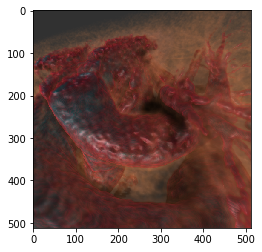

In [44]:
#output_dir = '/users/pgrad/martins7/turing/overflow-storage/lf_volume_sets'
output_dir='/media/martins7/TOSHIBA EXT/lf_volume_sets'
hdf5_name = 'lf_set.h5'
loc = os.path.join(output_dir, hdf5_name)

with h5py.File(loc, mode='r', libver='latest', swmr=True) as hdf:
    #print(list(hdf.keys()))
    plt.imshow((hdf['val']['colour']['images'][2,0,...]))
    #plt.imshow((hdf['val']['colour']['images'][2,0,:,:,:]))
    print(hdf['val']['colour']['images'][2, 0, ...])
    #print(hdf['val']['disparity'].attrs['shape'])
    #print(hdf['train']['colour'].attrs['shape'][2])
    col = torch.from_numpy(
        hdf['val']['colour']['images'][2, ...]).float()

In [ ]:
sample = {'colour': col}
print(sample)
sample = normalise_lf(sample)
print(sample)

In [104]:
from PIL import Image
dir1 = '/users/pgrad/martins7/turing/overflow-storage/lf_volume_sets/warped'
im1 = Image.open(os.path.join(dir1, 'Colour40.png'))
im1.load()
data1 = np.asarray(im1)
dir2 = '/users/pgrad/martins7/turing/overflow-storage/lf_volume_sets/val/0003'
im2 = Image.open(os.path.join(dir2, 'Colour40.png'))

In [130]:
x = np.arange(6).reshape(-1, 2)
for y1, y2 in x:
    print(y1)
    print(y2)

print((7 * 7)// 2 + 7 //2)
    
print(4 // 4)

0
1
2
3
4
5
27
1
